# 2 PROYECTO STORY POINTS 

# 1

#### PUNTOS A REALIZAR 
     - DETECION Y ELIMINACION DE OUTLIERS 
     - ENCODING 
     - IMPUTACION DE VALORES FALTANTES 
     - REDUCCION DE DIMENSIONALIDAD 
 # 2
    - IMPLEMENTAR LAS TRSANFORMACIONES REQURIDAS 
    - VOLVER A ENTRENAR EL MODELO DE ARBOL DE DESICION 
    
# 3 
    - ESCOGER 2 MODELOS AVANZADOS (REGRESION LINEAL CON ATRIBUTOS             POLINOMICOS) REGULARIZACION 
    -OPTIMIZAR HIPER PARAMETROS CON UN CROSS VALIDATION Y CON UN GRID        SEARCH 
    - COMPARAR CON EL PRIMER MODELO CUAL ELEGIRIA Y POR QUE 
# 4
    -DE ACUERDO A LO QUE EL MODELO PERMITE RESPONDE ALGUNAS O TODAS LAS      REGUNTAS: QUE VARIABLES FUERON RELEVANTES PARA EL MODELO PARA HACER      UNA PREDICCION? CUALES NO ?SI USASTE REGRESION LINEAL CON                NORMALIZACION PRESTA ATENCION A LOS PARAMETROS PENDIENTES , SI          USASTE DE E NSAMBLE DE ARBOLES , DEMAS DE VER LA IMPORTANCIOA DE        CADA ATRIBUTO TAMBIEN ELIGE ALGUNOS ARBOLES AL AZAR Y OBSERVA QUE        ATRIBUTOS CONSIDERAS IMPORTANTES 
     EN QUE SE DIFERENCIAN ESTOS ARBOLES ? POR QUE FINALMENETE RESPONDE
     COINCIDE CON LO QUE ESPERABAS A PARTIR DE TU EXPERIENCIA CON ESTE        DATASET
# 5 
     -COMO ES LA DISTRUBUCION DE LOS ERRORES ? DONDE FALLAN LOS MODELOS?       A QUE SE DEBE 
# 6 
     - CONCLUSIONES OBTENIDAS DEL TRABAJO 

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


In [60]:
data = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv')
print(data.shape)
data.head()



(146660, 19)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


VisUALIZAMOS LOS TIPOS DE PROPIEDAD 

In [61]:
data.property_type.unique()

array(['Departamento', 'PH', 'Casa', 'Lote', 'Casa de campo', 'Oficina',
       'Otro', 'Local comercial', 'Cochera', 'Depósito'], dtype=object)

In [62]:
data['l2'].value_counts(normalize=True) * 100


Capital Federal             63.097641
Bs.As. G.B.A. Zona Norte    16.556662
Bs.As. G.B.A. Zona Sur      11.709396
Bs.As. G.B.A. Zona Oeste     8.636302
Name: l2, dtype: float64

Viendo que la mayoria de los datos para l2 e se encuentran entre Capital Federal y Bs.As. G.B.A. Zona Norte  vamos a filtrar el dataset por estas regiones 

In [64]:
data = data[data.l2.isin(['Capital Federal','Bs.As. G.B.A. Zona Norte'])]
data.shape

(116821, 19)

In [66]:
data['property_type'].value_counts(normalize=True) * 100


Departamento       81.061624
PH                  9.719143
Casa                7.816232
Oficina             0.458822
Lote                0.428005
Otro                0.152370
Local comercial     0.103577
Cochera             0.097585
Depósito            0.089881
Casa de campo       0.072761
Name: property_type, dtype: float64

Viendo que la mayoria de los datos para property type se encuentran entre Departamento,Casa y PH vamos a filtrar el dataset por este tipo de propiedades

In [67]:
data = data[data.property_type.isin(['Departamento','Casa','PH'])]
data.shape

(115182, 19)

## Eliminamos las columnas innecesarias 

In [68]:
data.drop(columns=['l1','l3','lat','lon','start_date','end_date','created_on','description','operation_type','title','currency'], inplace=True)

In [42]:
data.describe()


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,91485.000000,91485.000000,89314.000000,82568.000000,82250.000000,9.148500e+04
mean,2.964278,1.960278,1.560147,112.626369,94.966310,2.595003e+05
std,1.314704,1.072946,0.860309,980.713664,778.515243,3.222654e+05
min,1.000000,0.000000,1.000000,10.000000,1.000000,6.000000e+03
25%,2.000000,1.000000,1.000000,49.000000,44.000000,1.200000e+05
50%,3.000000,2.000000,1.000000,71.000000,63.000000,1.750000e+05
75%,4.000000,3.000000,2.000000,111.000000,96.000000,2.790000e+05
max,26.000000,15.000000,14.000000,126062.000000,126062.000000,3.243423e+07


In [69]:
data.shape

(115182, 8)

In [70]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 1.77%
surface_total 7.24%
surface_covered 7.45%
price 0.00%
property_type 0.00%


vamos a imputar valores faltantes para bathromms primero 

In [71]:
media = data[["bathrooms","property_type"]].groupby("property_type").agg(pd.Series.median)
media = media.to_dict()["bathrooms"]

In [72]:
media

{'Casa': 2.0, 'Departamento': 1.0, 'PH': 1.0}

In [73]:
data.set_index("property_type", inplace=True)
data.bathrooms.fillna(media, inplace=True)
data.reset_index(inplace=True)

In [74]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 7.24%
surface_covered 7.45%
price 0.00%


In [75]:
media = data[["surface_covered","property_type"]].groupby("property_type").agg(pd.Series.std)
media = media.to_dict()["surface_covered"]

In [76]:
media

{'Casa': 1565.222260415273,
 'Departamento': 561.2803990938713,
 'PH': 1698.554925344774}

In [77]:
data.set_index("property_type", inplace=True)
data.surface_covered.fillna(media, inplace=True)
data.reset_index(inplace=True)

In [78]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 7.24%
surface_covered 0.00%
price 0.00%


In [79]:
media = data[["surface_total","property_type"]].groupby("property_type").agg(pd.Series.std)
media = media.to_dict()["surface_total"]

In [80]:
media

{'Casa': 3559.3934428549196,
 'Departamento': 619.7161143333194,
 'PH': 2255.2074235776026}

In [81]:
data.set_index("property_type", inplace=True)
data.surface_total.fillna(media, inplace=True)
data.reset_index(inplace=True)

In [82]:
for col in data.columns:
  nulos= data[col].isna().sum()
  print(col,   "{:.2f}%".format(nulos*100/146660))

property_type 0.00%
l2 0.00%
rooms 0.00%
bedrooms 0.00%
bathrooms 0.00%
surface_total 0.00%
surface_covered 0.00%
price 0.00%


In [84]:
data2 = data 

In [85]:
data2.shape

(115182, 8)

# Que transformaciones de datos elegi y por que ?


### - Hemos escogido para este dataset 3 tranformaciones de datos que son 
  
  * Detecion de outliers
  * Encoding 
  * imputacion de valores faltantes 
  * Escalado de datos
  
### - estas son las mas apropiadas ya que el dataset cuenta con una gran cantidad de valores atipicos lo que en anteriores           ocasiones hemos podido evidenciar con los boxplots asi que la primera tranformacion de datos sera la detecion de outliers       para eliminar estos despues, procedemos a hacer un encoding de la variable property type y por ultimo antes del train test el   escalado de datos de todas las variables contra price  

## Transformaciones de datos 

    -Detecion de outliers 
    -Encoding 
    -Escalado de datos 

#### Construimos un loop para verificar el % de valores faltantes 

# Detecion de outliers 


## Definimos una funcion para detectar los outliers 

In [86]:
def detect_IQR(data):
    Q1=data2[data].quantile(0.25)
    Q3=data2[data].quantile(0.75)
    IQR=Q3-Q1
    print('Maxima :',data2[data].max())
    print('Minima :',data2[data].min())
    print('IQR',IQR)

In [87]:
detect_IQR('surface_total')

Maxima : 169000.0
Minima : 10.0
IQR 103.0


In [88]:
detect_IQR('surface_covered')

Maxima : 126062.0
Minima : 1.0
IQR 77.0


In [89]:
detect_IQR('price')

Maxima : 32434232.0
Minima : 6000.0
IQR 157900.0


In [90]:
detect_IQR('bathrooms')

Maxima : 14.0
Minima : 1.0
IQR 1.0


In [91]:
detect_IQR('bedrooms')

Maxima : 15.0
Minima : 0.0
IQR 2.0


In [92]:
detect_IQR('rooms')

Maxima : 35.0
Minima : 1.0
IQR 2.0


In [93]:

print('IQR PARA surface_total:', data2['surface_total'].max())
print('IQR PARA surface_covered:',data2['surface_covered'].max())
print('IQR PARA price:',data2['price'].max())
print('IQR PARA bedrooms:',data2['bedrooms'].max())
print('IQR PARA rooms:',data2['rooms'].max())

IQR PARA surface_total: 169000.0
IQR PARA surface_covered: 126062.0
IQR PARA price: 32434232.0
IQR PARA bedrooms: 15.0
IQR PARA rooms: 35.0


In [94]:

def FILTRO_IQR(datafiltro,nombredata):
    q1=datafiltro[nombredata].quantile(0.25)
    q3=datafiltro[nombredata].quantile(0.75)
    iqr=q3-q1
    limitebajo=q1-1.5*iqr
    limitealto=q3+1.5*iqr
    datalimpia=datafiltro.loc[(datafiltro[nombredata]>limitebajo)&(datafiltro[nombredata]<limitealto)]
    return datalimpia

In [95]:
filtrodata2=FILTRO_IQR(data2,'surface_total')
filtrodata2=FILTRO_IQR(filtrodata2,'surface_covered')
filtrodata2=FILTRO_IQR(filtrodata2,'price')
filtrodata2=FILTRO_IQR(filtrodata2,'bathrooms')
filtrodata2=FILTRO_IQR(filtrodata2,'bedrooms')
filtrodata2=FILTRO_IQR(filtrodata2,'rooms')
filtrodata2=filtrodata2[filtrodata2.surface_total>filtrodata2.surface_covered]

In [96]:

print(filtrodata2['surface_total'].max())
print(filtrodata2['surface_covered'].max())
print(filtrodata2['price'].max())
print(filtrodata2['bathrooms'].max())
print(filtrodata2['bedrooms'].max())
print(filtrodata2['rooms'].max())


310.0
169.0
444752.0
3.0
3.0
4.0


In [97]:
filtrodata2.shape

(58233, 8)

In [98]:
#datacolums=['rooms','bedrooms','bathrooms','surface_total','surface_covered','price','property_type']
#datacolums=pd.DataFrame(datacolums)
#datacolums.isnull().sum()
#datacolums.shape()
#datacolums = data[datacolums].copy() 
#datacolums =pd.DataFrame(datacolums)
#filtrodata2 = datacolums.dropna()

In [99]:
filtrodata2.head()

,property_type,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
1,PH,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0
3,PH,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0
7,PH,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0
8,PH,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0
9,PH,Capital Federal,2.0,1.0,2.0,66.0,49.0,170000.0


## Vamos a hacer encoding para la variable property_type para asi poder alimentar el modelo con esta variable a la hora de hace predicciones 

In [100]:
dummies = pd.get_dummies(filtrodata2, columns=["property_type"])
dummies.head()

,l2,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
1,Capital Federal,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
3,Capital Federal,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
7,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
8,Capital Federal,1.0,1.0,1.0,45.0,37.0,89000.0,0,0,1
9,Capital Federal,2.0,1.0,2.0,66.0,49.0,170000.0,0,0,1


In [101]:
dummies.shape
type(dummies)

pandas.core.frame.DataFrame

## Realizamos un mapa de calor para  visualizar valores faltantes 

<AxesSubplot:>

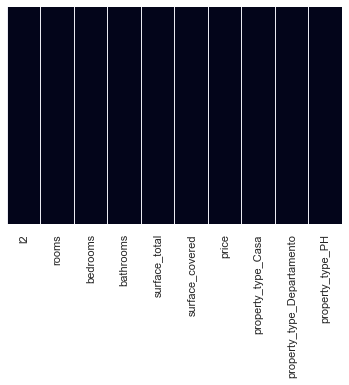

In [102]:
sns.heatmap(dummies.isnull(), yticklabels=False, cbar=False)


In [115]:
dummies.shape

(68879, 16)

# Definimos x e y para entrenar nuestros modelos 

In [103]:
X = dummies[["rooms","surface_covered","surface_total","bedrooms","bathrooms","property_type_Casa","property_type_Departamento","property_type_PH"]] #Observa que sólo usamos 3 features del dataset
y = dummies['price']

#X = dummies.drop(columns=["price"])
#y = dummies.price


# Escalado de datos

In [104]:
escalador = StandardScaler()
escalador.fit(X)

StandardScaler()

In [105]:
X_escalado = escalador.transform(X)
X_escalado

array([[-0.78417952, -0.24261243, -0.25580057, ..., -0.17550007,
        -2.66738946,  3.11648398],
       [-0.78417952, -0.55470435,  0.11153233, ..., -0.17550007,
        -2.66738946,  3.11648398],
       [-1.93524642, -1.06185371, -0.86802207, ..., -0.17550007,
        -2.66738946,  3.11648398],
       ...,
       [ 0.36688738,  0.7326748 ,  0.38090979, ..., -0.17550007,
         0.37489838, -0.32087442],
       [ 1.51795428,  1.00575522,  2.04615226, ..., -0.17550007,
         0.37489838, -0.32087442],
       [-1.93524642, -1.13987669, -0.74557777, ..., -0.17550007,
         0.37489838, -0.32087442]])

## Train test split 


In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

# - Construimos un DecisionTreeRegressor con nuestro nuevo dataset transfromado 

In [107]:
decision_tree= DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)

y_arbol_train_pred = decision_tree.predict(X_train)
y_arbol_test_pred= decision_tree.predict(X_test)

In [108]:

MAE_train=mean_absolute_error(y_train,y_arbol_train_pred)
MAE_test=mean_absolute_error(y_test,y_arbol_test_pred)
RMSE_train=np.sqrt(mean_squared_error(y_train,y_arbol_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_arbol_test_pred))
r2_train= metrics.r2_score(y_train, y_arbol_train_pred)
r2_test= metrics.r2_score(y_test, y_arbol_test_pred)

In [109]:
print("El Error absoluto medio train:",MAE_train)
print("El Error absoluto medio test:",MAE_test)
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

El Error absoluto medio train: 18558.001297095147
El Error absoluto medio test: 30125.775339874486
*******************************************
Error cudratico medio train: 31102.948048150807
Error cudratico medio test: 48327.81053004094
*******************************************
El Coeficiente de determinacion train: 0.8563911121015318
El Coeficiente de determinacion test: 0.6567428727805912
*******************************************


### Metricas del anterior arbol de desicion 



El Error absoluto medio train: 23681.8678332786
El Error absoluto medio test: 49388.884628718595
*******************************************
Error cudratico medio train: 54047.89650654257
Error cudratico medio test: 141864.7831195434
*******************************************
El Coeficiente de determinacion train: 0.9671459367517681
El Coeficiente de determinacion test: 0.7793119430612151

### - El árbol de decisión que construimos en el sprint anterior tuvo ligeras mejoras después de eliminar outliers , eliminar los valores faltantes y por ultimo escalar los datos, como podemos ver los resultados del árbol en las métricas escogidas para evaluar este modelo vemos que el valor para el error absoluto medio en el primer modelo fue de 49388.88 para el test  en este nuevo modelo el error absoluto medio 51290.17 vemos un incremento del  3.85% del error respecto al primer modelo así mismo para el error cuadrático medio no mostro mejora en el, sin embargo el preprocesamiento de datos mejoro el coeficiente de determinación en un 0.0006% lo que no es una mejora sustancial lo que nos lleva a la interrogante debo utilizar un modelo más complejo tipo boosting o un tipo bagging para mejorar estos resultados 

# Modelos avanzados 


## - Vamos a construir un random forest como primer modelo avanzado antes de crear este vamos a hacer cross validation a los datos 


In [110]:
from sklearn.ensemble import RandomForestRegressor

In [178]:
clf_cv =cross_validate(clf,X_escalado, y, cv=5,)


In [180]:
clf_cv

{'fit_time': array([19.14434791, 13.85581517, 13.34197021, 13.58159328, 13.92435718]),
 'score_time': array([0.364043  , 0.36700058, 0.36644483, 0.37152267, 0.33597326]),
 'test_score': array([0.66175734, 0.68418666, 0.65676705, 0.64853176, 0.69040575])}

In [111]:
X_train,X_test,y_train,y_test= train_test_split(X_escalado, y,test_size=0.20,random_state=42)

In [112]:
clf = RandomForestRegressor(n_estimators=100, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
clf.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_jobs=-1, oob_score=True,
                      random_state=42)

## - Para las metricas de evalucacion hemos escogido el error cuadratico medio y el r2  

In [113]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)
#print(metrics.accuracy_score(y_train, y_train_pred))
#print(metrics.accuracy_score(y_test, y_test_pred))

In [114]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)



In [115]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

Error cudratico medio train: 32525.184936761583
Error cudratico medio test: 44389.52498330309
*******************************************
El Coeficiente de determinacion train: 0.8429572981915808
El Coeficiente de determinacion test: 0.7104081611591433
*******************************************


In [186]:
clf.oob_score_

0.6763166729135339

In [187]:
clf.feature_importances_

array([6.61073649e-02, 3.41965973e-01, 3.08151149e-01, 4.47600934e-02,
       1.60819700e-01, 1.72359555e-02, 0.00000000e+00, 4.46126702e-02,
       1.10644251e-05, 5.64096586e-06, 3.20836533e-04, 3.14605070e-04,
       1.56949472e-02])

In [188]:
clf.estimators_

[DecisionTreeRegressor(max_features='sqrt', random_state=1608637542),
 DecisionTreeRegressor(max_features='sqrt', random_state=1273642419),
 DecisionTreeRegressor(max_features='sqrt', random_state=1935803228),
 DecisionTreeRegressor(max_features='sqrt', random_state=787846414),
 DecisionTreeRegressor(max_features='sqrt', random_state=996406378),
 DecisionTreeRegressor(max_features='sqrt', random_state=1201263687),
 DecisionTreeRegressor(max_features='sqrt', random_state=423734972),
 DecisionTreeRegressor(max_features='sqrt', random_state=415968276),
 DecisionTreeRegressor(max_features='sqrt', random_state=670094950),
 DecisionTreeRegressor(max_features='sqrt', random_state=1914837113),
 DecisionTreeRegressor(max_features='sqrt', random_state=669991378),
 DecisionTreeRegressor(max_features='sqrt', random_state=429389014),
 DecisionTreeRegressor(max_features='sqrt', random_state=249467210),
 DecisionTreeRegressor(max_features='sqrt', random_state=1972458954),
 DecisionTreeRegressor(max_f

In [87]:
clf_tree = clf.estimators_[70]
clf_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 1324556529,
 'splitter': 'best'}

In [ ]:
y_train_pred = clf_tree.predict(X_train)
y_test_pred = clf_tree.predict(X_test)

In [ ]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [ ]:
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

In [ ]:
train_RMSE = []
test_RMSE = []
train_r2 = []
test_r2 = []
oob_scores = []

N_estimadores= [1,2,3,4,5,10,25,50,100,250,500,1000]
for estimadores in N_estimadores:
    print(estimadores)
    clf = RandomForestRegressor(n_estimators=estimadores, max_features='sqrt', n_jobs=-1, oob_score = True, random_state = 42)
    clf.fit(X_train,y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_RMSE.append(mean_squared_error(y_train,y_train_pred))
    test_RMSE.append(mean_squared_error(y_test,y_test_pred))
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))
    oob_scores.append(clf.oob_score_)
    
train_RMSE = np.array(train_RMSE)
test_RMSE = np.array(test_RMSE)

train_r2 = np.array(train_r2)
test_r2 = np.array(test_r2)


oob_scores = np.array(oob_scores)

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_RMSE, label = 'train_RMSE')
plt.plot(N_estimadores, test_RMSE, label = 'test_RMSE')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('RMSE')
plt.legend()

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(N_estimadores, train_r2, label = 'train_r2')
plt.plot(N_estimadores, test_r2, label = 'test_r2')
plt.plot(N_estimadores, oob_scores, label = 'OOB')
plt.xlabel('Numero de estimadores')
plt.ylabel('r2')
plt.legend()
# plt.xlim(0,50)
plt.show()



## Ahora vamos a construir un Adaboost 

In [116]:
from sklearn.ensemble import AdaBoostRegressor

In [117]:
#X = dummies[["rooms","surface_covered","surface_total","bedrooms","bathrooms","property_type_Casa","property_type_Casa de campo","property_type_Cochera","property_type_Departamento","property_type_Depósito","property_type_Local comercial","property_type_Lote","property_type_Oficina","property_type_Otro","property_type_PH"]] #Observa que sólo usamos 3 features del dataset
#y = dummies['price']

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [119]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20))
# Entrenamos el modelo
ada_clf.fit(X_train, y_train)
#get_params().keys()

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20))

In [120]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [121]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [122]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 37472.733508102036
Error cudratico medio test: 47908.88320236204
*******************************************
El Coeficiente de determinacion train: 0.7916934939081472
El Coeficiente de determinacion test: 0.6609740233706596
*******************************************


In [194]:

param_dist = {
 'n_estimators': [50, 100,250,500,1000],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

ada_clf = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

ada_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 100, 250, 500,
                                                         1000]})

In [195]:
ada_clf.best_params_

{'n_estimators': 100, 'loss': 'linear', 'learning_rate': 0.05}

In [123]:
ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100,loss='linear',learning_rate=0.05)


In [124]:
ada_clf.fit(X_train, y_train)


AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=20),
                  learning_rate=0.05, n_estimators=100)

In [125]:
y_train_pred = ada_clf.predict(X_train)
y_test_pred = ada_clf.predict(X_test)

In [126]:
RMSE_train=np.sqrt(mean_squared_error(y_train,y_train_pred))
RMSE_test=np.sqrt(mean_squared_error(y_test,y_test_pred))
r2_train= metrics.r2_score(y_train, y_train_pred)
r2_test= metrics.r2_score(y_test, y_test_pred)

In [127]:
print("*******************************************")
print("Error cudratico medio train:",RMSE_train)
print("Error cudratico medio test:",RMSE_test)
print("*******************************************")
print("El Coeficiente de determinacion train:",r2_train)
print("El Coeficiente de determinacion test:",r2_test)
print("*******************************************")

*******************************************
Error cudratico medio train: 32077.748407712483
Error cudratico medio test: 46537.56685695031
*******************************************
El Coeficiente de determinacion train: 0.8473559644972812
El Coeficiente de determinacion test: 0.6801044287408788
*******************************************
